# ST445 Managing and Visualizing Data
## Dimensionality Reduction
### Milan Vojnovic and Christine Yuen, MT 2017
---

In this notebook, we are going to apply dimensionality reduction methods that we introduced and discussed in the lecture to the MNIST handwritten digits dataset. The goal is to gain a hands-on experience with applying dimensionality reduction methods for the purpose of data visualizations by using functiions provided by sklearn.manifold module. We will learn how to set parameters for various methods, measure computation speed of various methods, and asses the structure of input data revealed by different methods in a two-dimensional map space.

We consider eight different dimensionality reduction methods covered in the lecture, which are listed along with references to the corresponding functions as follows:

1. **Principal Component Analysis (PCA)**: [sklearn.decomposition.TruncatedSVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

2. **Multi Dimensional Scaling (MDS)**: [sklearn.manifold.MDS](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS)

3. **Isomap**: [sklearn.manifold.isomap](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)

4. **Spectral embedding**: [sklearn.manifold.SpectralEmbedding](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html#sklearn.manifold.SpectralEmbedding)

5. **Locally Linear Embedding (LLE)**: [sklearn.manifold.locally_linear_embedding](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html#sklearn.manifold.locally_linear_embedding)

6. **Hessian LLE**: [sklearn.manifold.locally_linear_embedding](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html#sklearn.manifold.locally_linear_embedding)

7. **Local Tangent Space Alignment (LTSA)**: [sklearn.manifold.locally_linear_embedding](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html#sklearn.manifold.locally_linear_embedding)

8. **Stochastic Neighbor Embedding (t-SNE)**: [sklearn.manifold.TSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)

We cover only the methods covered in lectures. Note that [sklearn.manifold](http://scikit-learn.org/stable/modules/manifold.html) contains also implementations of some other dimensionality reduction methods.

## Loading the input data points

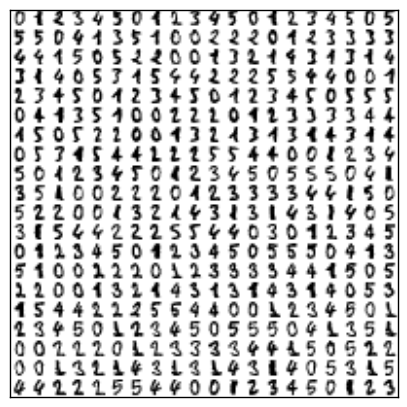

In [20]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target

n_samples, n_features = X.shape
n_neighbors = 30


# visualizing input data
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=plt.cm.binary);
plt.xticks([]);
plt.yticks([]);

# compute time
ctime = np.zeros(8)

# set file name here
fname = '...-ctime.csv'

In [2]:
# This is a handy plotting function we're going to use repeatedly
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])

    if title is not None:
        plt.title(title)
    plt.show()

# Principal Component Analysis (PCA)

This is the first dimensionality reduction method we have studied in the class. It is a linear projection of input data points from a p-dimensional random space to a q-dimensionality space. In our case, the projection is to a two-dimensional random space, hence $q = 2$. The linear project is obtained by using $q$ eigenvectors of the covariance matrix of the input data points, which correspond to $q$ largest eigenvalues.

Communication complexity = $O(p^2n + p^3)$.

Lecture slides 11-13.

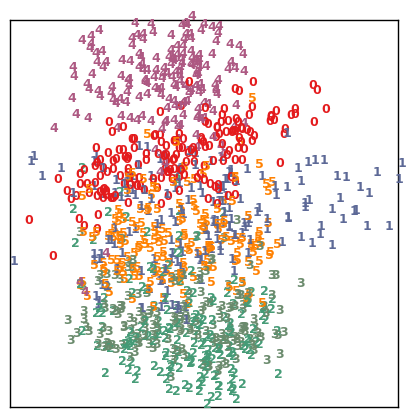

Compute time = 2.16 sec
(1083, 64)


In [13]:
t0 = time()

## your code

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[0] = dt

# Multi Dimensional Scaling (MDS)

We now consider metric MDS method described in lecture slides 24-25. This method aims to minimize a cost function that is defined as the sum of square differences between inter-point Euclidean distances in the input and map spaces. This optimization is carried out by an iterative optimization method referred to as SMACOF (scaling by majorizing a complicated function). Since the method is iterative, it is hard to characterize the computation complexity, which is thus not given.

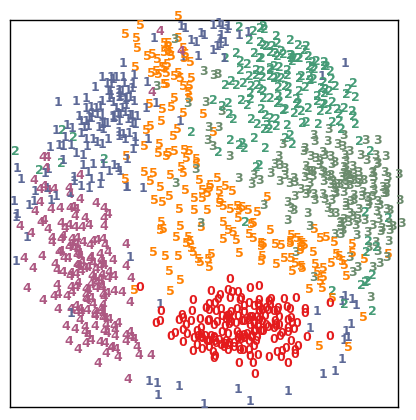

Compute time = 7.20 sec


In [4]:


t0 = time()

## your code

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[1] = dt

# Isomap

This is a non-linear projection method that we introduced in lecture slides 28-35. This method consists of the following three main steps:

1. Computing a nearest neighbor graph based on Euclidean distances between input data points
2. Estimating geodesic distances by shortest paths in the nearest neighbor graph
3. Computing map points by applying metric MDS to the input inter-point geodesic distances

Computation complexity of Isomap = $O(qn^2 + (k + \log(n))n^2 + p \log(k) \log(n) n)$

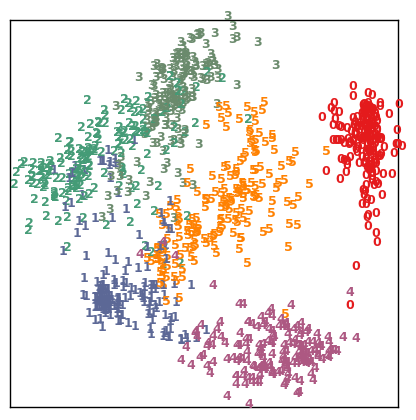

Compute time = 2.89 sec


In [5]:
t0 = time()

# your codes

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[2] = dt

# Spectral embedding

We now consider the spectral embedding method described in lecture slides 36-41. The method consists of the following three steps:

1. Finding a nearest neighbor graph
2. Associating each edge with a weight
3. Finding embedding points that minimize a cost function (defined such that it aims to map near input data points near to each other)

Computation complexity of spectral embedding = $O(qn^2 + pk^3 n + p \log(k) \log(n) n)$

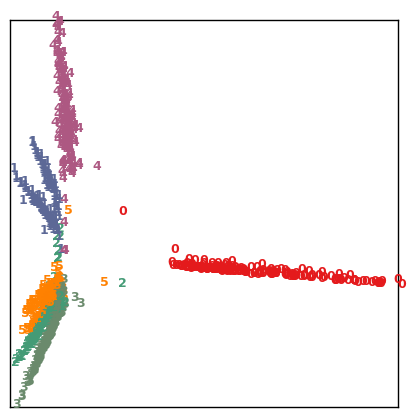

Compute time = 0.22 sec


In [6]:

t0 = time()

# your codes

print("Compute time = %.2f sec" % dt)

ctime[3] = dt

# Locally Linear Embedding (LLE)

This is the method described in lecture slides 42-47. It consists of three steps:

1. Computing a nearest neighbor graph
2. Computing local weights
3. Combuting embedding points

Commputation complexity of LLE = $O(qn^2 + pk^3 n + p \log(k) \log(n) n)$

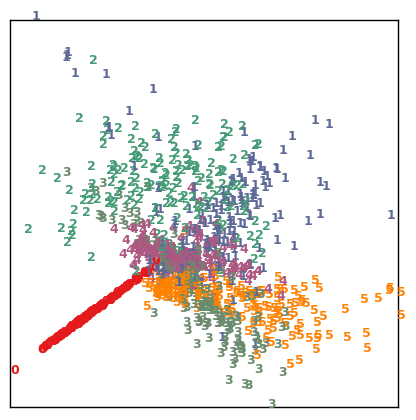

Compute time = 2.22 sec


In [7]:

t0 = time()

# your codes

dt = time()-t0

print("Compute time = %.2f sec" % dt)

ctime[4] = dt

# Hessian Locally Linear Embedding (HLLE)

Here we consider a variant of local linear embedding known as Hessian LLE or Hesian eigenmaps. This method is briefly mentioned on lecture slides 48-49. 

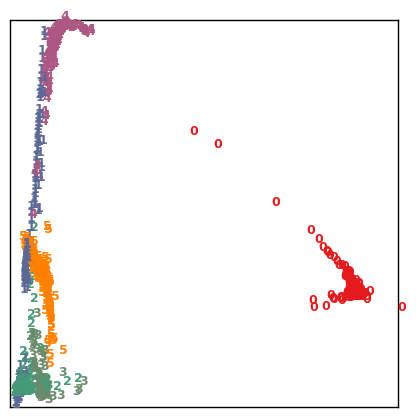

Compute time = 2.73 sec


In [8]:

t0 = time()

# your codes

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[5] = dt

# Local Tangent Space Allignment (LTSA)

We now consider the method described in lectures slides 50-58. This method consists of three steps:

1. Computing a nearest neighbor graph
2. Estimating local linear manifolds for each input data point
3. Computing global map points

Computation complexity of LTSA = $O(qn^2 + pk^3 n + qk^2 + p \log(k)\log(n) n)$

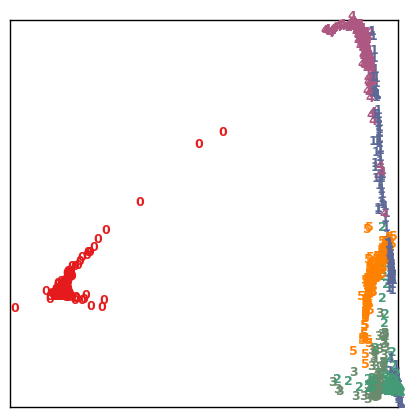

Compute time = 2.54 sec


In [9]:

t0 = time()

# your codes

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[6] = dt

# Stochastic Neighbor Embedding (t-SNE)

We now consider the last method we covered in the lecture in lecture slides 59-75. The key idea of this method is to assume a model according to which points in the input space and the map space are asssumed to be sample from given parametric distribution. The dimensionality reduction problem then amounts to finding map points that minimize a divergence between these two distribution functions.

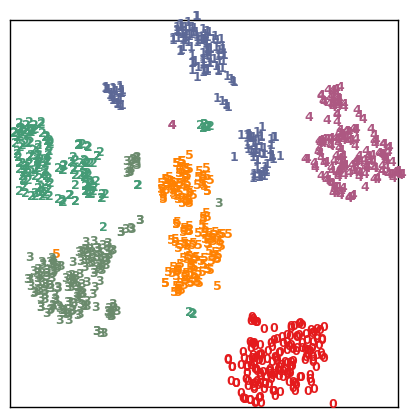

Compute time = 7.13 sec


In [10]:

t0 = time()

# your codes

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[7] = dt

In [11]:
# make sure you run this cell at the end
np.savetxt(fname, ctime)